In [11]:
# Scrap EspnCricInfo Bowlers data website
from bs4 import BeautifulSoup
import requests
import csv
flag=1
def scrapESPN(url,flag):
  p = requests.get(url)
  soup = BeautifulSoup(p.content, 'html.parser')
  content = soup.find_all('tr', class_='data1')
  fields = ['Player',   'Span', 'Mat',  'Inns', 'NO',   'Runs', 'HS',   'Ave',  'BF',   'SR',   '100',  '50',   '0',    '4s',   '6s','']
  itemfull = []
  for item in content:
    items = []
    playerdata=(item.find_all('td'))
    for i in playerdata:
      items.append(i.text)
    itemfull.append(items)
  
  with open("PLAYERS.csv", 'a') as csvfile:  
      # creating a csv writer object  
      csvwriter = csv.writer(csvfile)
      if(flag==1):
        csvwriter.writerow(fields)
        flag=0
      csvwriter.writerows(itemfull)

url1 = "https://stats.espncricinfo.com/ci/engine/stats/index.html?class=3;home_or_away=1;home_or_away=2;home_or_away=3;orderby=sixes;orderbyad=reverse;"
url2 = ""
url3 = "result=1;result=2;result=3;result=5;template=results;type=batting"
url = url1+url2+url3
flag=1
scrapESPN(url,1)
for i in range(2,20):
  url2 = "page="+str(i)+";"
  url = url1+url2+url3
  print(url)
  scrapESPN(url,0)

https://stats.espncricinfo.com/ci/engine/stats/index.html?class=3;home_or_away=1;home_or_away=2;home_or_away=3;orderby=sixes;orderbyad=reverse;page=2;result=1;result=2;result=3;result=5;template=results;type=batting
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=3;home_or_away=1;home_or_away=2;home_or_away=3;orderby=sixes;orderbyad=reverse;page=3;result=1;result=2;result=3;result=5;template=results;type=batting
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=3;home_or_away=1;home_or_away=2;home_or_away=3;orderby=sixes;orderbyad=reverse;page=4;result=1;result=2;result=3;result=5;template=results;type=batting
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=3;home_or_away=1;home_or_away=2;home_or_away=3;orderby=sixes;orderbyad=reverse;page=5;result=1;result=2;result=3;result=5;template=results;type=batting
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=3;home_or_away=1;home_or_away=2;home_or_away=3;orderby=sixes;orderbyad=r

In [12]:
import pandas as pd
data = pd.read_csv("PLAYERS.csv")
df = data.head(30)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

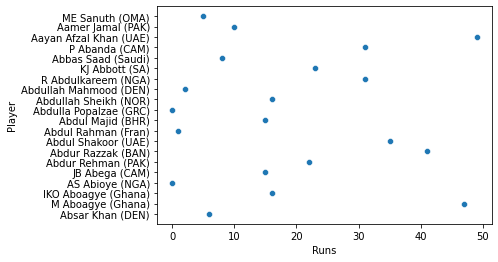

In [8]:
df = data.head(20)
sns.scatterplot(data=df, y="Player", x="Runs")

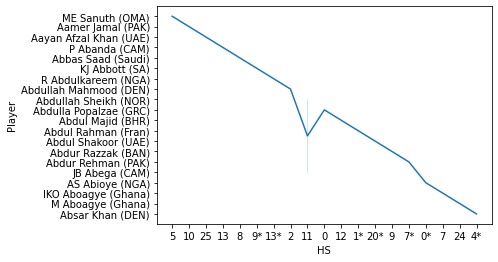

In [9]:
sns.lineplot(data=df, x="HS", y="Player")

<Figure size 2520x2016 with 0 Axes>

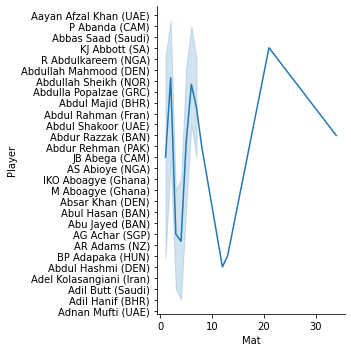

In [5]:
plt.figure(figsize=(35,28))
df = data.head(30)
sns.relplot(data=df, x="Mat", y="Player", kind="line")